In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


c:\users\bubun\python\python 3.8\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


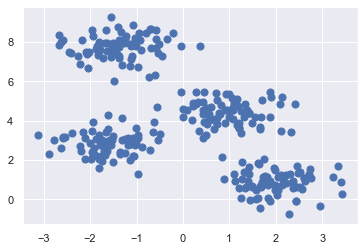

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples=300, centers=4,
                     cluster_std=0.60, random_state=0)
plt.scatter(X[:,0],X[:,1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=4)
kmeans_model.fit(X)
y_kmeans=kmeans_model.predict(X)

In [4]:
y_kmeans


array([2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3,
       0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 3, 0, 3,
       1, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 0,
       2, 2, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 1, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 2, 1, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 3, 3, 1, 2,
       0, 1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 1])

# K-means Implementation

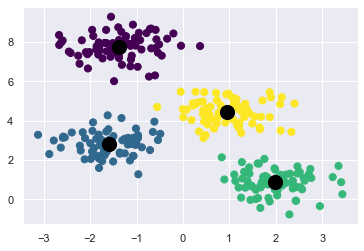

In [5]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    #Randomly choose clusters
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]#to choose a index and restrict the array to 4 clusters and shape is to give that shape
    center=X[i]
    while(True):
        #Assign labels based on closest center
        labels=pairwise_distances_argmin(X,center)
        #Find new center from means of points
        new_center=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        if np.all(center==new_center):#The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
            break
        center=new_center
    return center,labels 
        
center,labels=find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis');
plt.scatter(center[:,0],center[:,1],c='black',s=200,alpha=1.0);

# Use Case Of K-Means Clustering

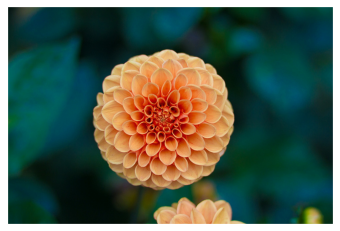

In [8]:
from sklearn.datasets import load_sample_image
china=load_sample_image("flower.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [10]:
china.shape


(427, 640, 3)

In [14]:
data=china/255.0 #to get the values between 0 and 1
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [15]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [33]:
def plot_pixels(data,title,colors=None,N=10000 ):
    if(colors is None):
        colors=data
    #choose a random subset 
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    
    fig, ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel="Red",ylabel="Green",xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel="Red",ylabel="Blue",xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20);

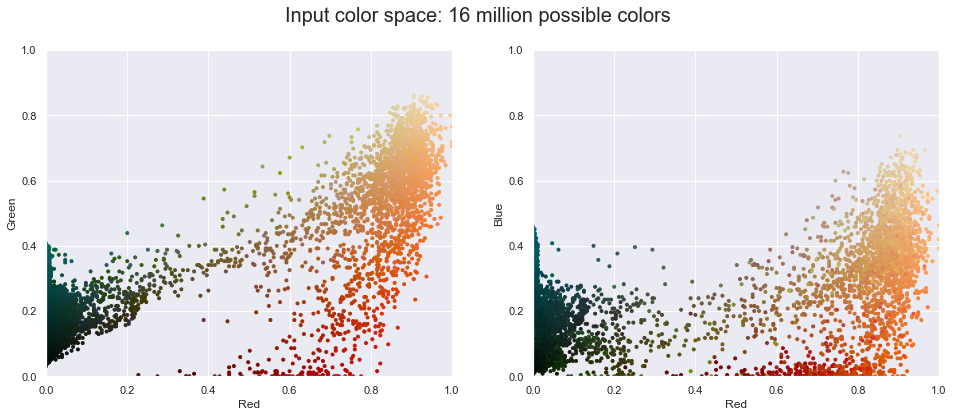

In [34]:
plot_pixels(data,title="Input color space: 16 million possible colors")

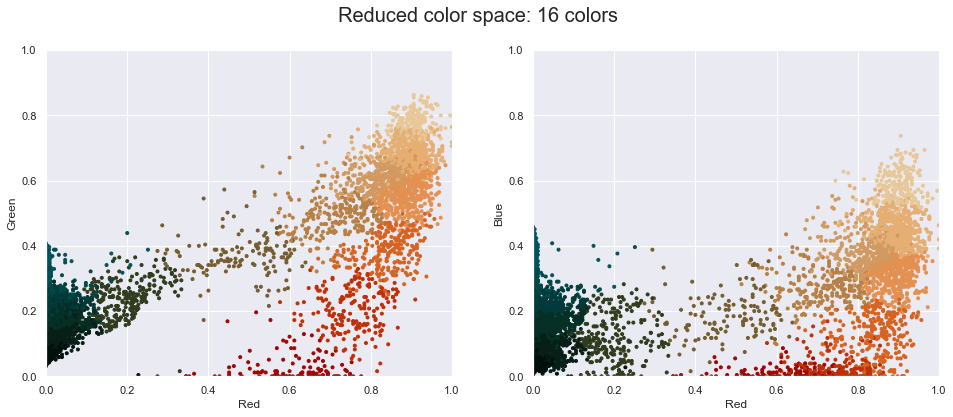

In [27]:
#to fix Numpy issues
import warnings;warnings.simplefilter("ignore")

from sklearn.cluster import MiniBatchKMeans

kmeans_model=MiniBatchKMeans(16)
kmeans_model.fit(data)
new_colors=kmeans_model.cluster_centers_[kmeans_model.predict(data)]

plot_pixels(data,title="Reduced color space: 16 colors",colors=new_colors)

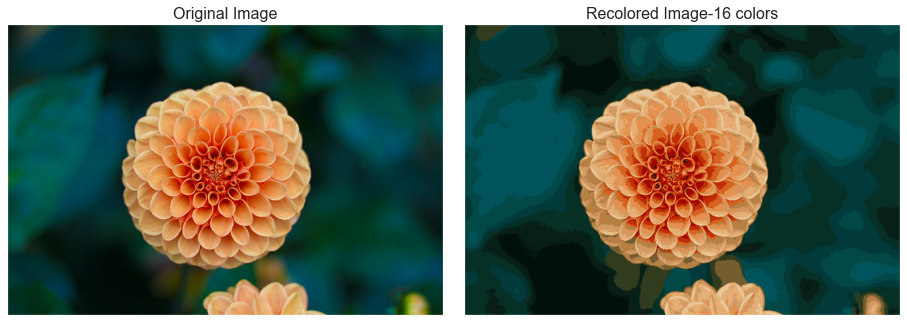

In [30]:
china_recolored=new_colors.reshape(china.shape)
fig, ax=plt.subplots(1,2,figsize=(16,6),
                    subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16);
ax[1].imshow(china_recolored)
ax[1].set_title("Recolored Image-16 colors", size=16);

# Decision Tree 

# Use Case of Decision Tree

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

fileName='C:/Users/BUBUN/Downloads/Machine Learning Full/Decision Tree/Decision_Tree_ DatasetCSV.csv'
balance_data=pd.read_csv(fileName,sep=",",header=0)

In [4]:
print("Dataset Shape: ", balance_data.shape)

Dataset Shape:  (1000, 5)


In [6]:
print("Dataset::")
print(balance_data.head())

Dataset::
  Result  Initial Payment  Last Payment  Credit Score  House Number
0    yes              201         10018           250          3046
1    yes              205         10016           395          3044
2    yes              257         10129           109          3251
3    yes              246         10064           324          3137
4    yes              117         10115           496          3094


In [7]:
X=balance_data.values[:,1:5]
Y=balance_data.values[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=100)
clf_entropy=DecisionTreeClassifier( criterion='entropy',random_state=100, max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [8]:
y_answer=clf_entropy.predict(X_test)
print(y_answer)

['yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'No' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes'
 'No' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'No'
 'yes' 'yes' 'yes' 'No' 'No' 'No' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'yes' 'No' 'No' 'No' 'No' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No' 'yes'
 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'yes' 'No' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No'
 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'No' 'yes'
 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'No' 'No'
 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'N

In [9]:
print("Accuracy is: ", accuracy_score(y_test,y_answer)*100)

Accuracy is:  93.66666666666667


# Random forest Classification

# Use Case of Random forest Classification

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
#Setting Random seed
np.random.seed(0)

In [11]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df['is_train']=np.random.uniform(0,1,len(df))<=0.75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [18]:
train,test=df[df['is_train']==True],df[df['is_train']==False]
print("Observations in training data: ", len(train))
print("Observations in testing data: ", len(test))

Observations in training data:  118
Observations in testing data:  32


In [20]:
features=df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [21]:
y=pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [22]:
random_clf=RandomForestClassifier(n_jobs=2, random_state=0)
random_clf.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [25]:
y_predict=random_clf.predict(test[features])
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [29]:
random_clf.predict_proba(test[features])[:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [30]:
predict_ans=iris.target_names[y_predict]
predict_ans[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [31]:
test.species.head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [36]:
#creating a confusion matrix
pd.crosstab(test['species'],predict_ans,rownames="Actual Species", colnames="Predicted species")

AssertionError: arrays and names must have the same length

# KNN Algorithm



# Use case of KNN Algorithm 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [6]:
diabetes_dataset='C:\\Users\\BUBUN\\Downloads\\Machine Learning Full\\KNN\\diabetes.csv'
dataset=pd.read_csv(diabetes_dataset)
dataset.shape
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for feature in zero_not_accepted:
    dataset[feature]=dataset[feature].replace(0,np.NAN)
    mean=int(dataset[feature].mean(skipna=True))
    dataset[feature]=dataset[feature].replace(np.NAN,mean)

In [8]:
X=dataset.iloc[:,0:8]
Y=dataset.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [15]:
K_classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [16]:
K_classifier.fit(X_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [18]:
y_predict=K_classifier.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [19]:
print("The f1 Score is: ", f1_score(y_test,y_predict))
print("The accuracy Score is:  ", accuracy_score(y_test,y_predict))

The f1 Score is:  0.6956521739130436
The accuracy Score is:   0.8181818181818182


# SVM 
#SVM Use Case

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs


In [23]:
X,y=make_blobs(n_samples=40,centers=2, random_state=20)
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X,y)

SVC(C=1, kernel='linear')

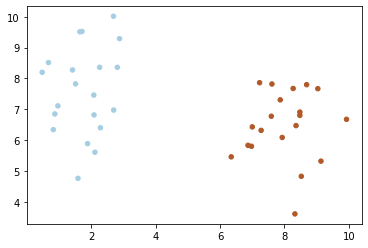

In [31]:
plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap=plt.cm.Paired)
plt.show()

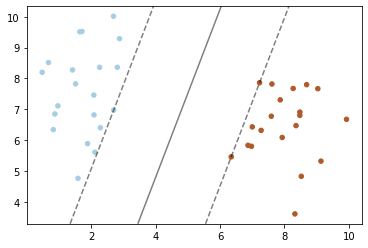

In [35]:
clf=svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap=plt.cm.Paired)

ax=plt.gca()
x_lim=ax.get_xlim()
y_lim=ax.get_ylim()
xx=np.linspace(x_lim[0],x_lim[1],30)
yy=np.linspace(y_lim[0],y_lim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX,YY,Z,colors='k',      levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],linewidth=1,facecolors='none')

plt.show()